### Setup

In [1]:
import lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

from datetime import datetime

l = lib.Offload()

In [2]:
stundenplan_primar_OG1 = [
    # week offset, (hour_start, minute_start), (hour_start, minute_start), people
    (0, ( 7, 35), ( 8, 00), 22),
    (0, ( 8,  5), ( 8, 50), 22),
    (0, ( 8, 55), ( 9, 40), 22),
    (0, (13, 30), (14, 15), 11),
    (0, (14, 20), (15,  5), 11),
    (0, (15, 20), (16,  5), 11),

    (1, ( 7, 35), ( 8, 00), 22),
    (1, ( 8,  5), ( 8, 50), 22),
    (1, ( 8, 55), ( 9, 40), 22),
    (1, (10, 00), (10, 45), 22),
    (1, (10, 50), (11, 35), 22),
    (1, (13, 30), (14, 15), 11),
    (1, (14, 20), (15,  5), 11),
    (1, (15, 20), (16,  5), 11),

    (2, ( 7, 35), ( 8, 00), 22),
    (2, ( 8,  5), ( 8, 50), 22),
    (2, (10, 00), (10, 45), 11),
    (2, (10, 50), (11, 35), 11),

    (3, ( 7, 35), ( 8, 00), 22),
    (3, ( 8,  5), ( 8, 50), 22),
    (3, ( 8, 55), ( 9, 40), 22),
    (3, (10, 00), (10, 45), 22),
    (3, (13, 30), (14, 15), 22),
    (3, (14, 20), (15,  5), 22),
    (3, (15, 20), (16,  5), 22),

    (4, ( 7, 35), ( 8, 00), 22),
    (4, ( 8,  5), ( 8, 50), 11),
    (4, ( 8, 55), ( 9, 40), 11),
    (4, (10, 00), (10, 45), 11),
    (4, (10, 50), (11, 35), 11),
]

In [3]:
stundenplan_primar_EG = [
    # week offset, (hour_start, minute_start), (hour_start, minute_start), people
    (0, ( 7, 35), ( 8, 00), 21),
    (0, ( 8,  5), ( 8, 50), 21),
    (0, ( 8, 55), ( 9, 40), 21),
    (0, (10, 00), (10, 45), 21),
    (0, (10, 50), (11, 35), 21),

    (1, ( 7, 35), ( 8, 00), 21),
    (1, ( 8,  5), ( 8, 50), 21),
    (1, ( 8, 55), ( 9, 40), 21),
    (1, (10, 00), (10, 45), 21),
    (1, (13, 30), (14, 15), 11),
    (1, (14, 20), (15,  5), 11),
    (1, (15, 20), (16,  5), 11),

    (2, ( 7, 35), ( 8, 00), 21),
    (2, ( 8,  5), ( 8, 50), 21),
    (2, ( 8, 55), ( 9, 40), 21),
    (2, (10, 00), (10, 45), 21),
    (2, (10, 50), (11, 35), 21),

    (3, ( 7, 35), ( 8, 00), 21),
    (3, ( 8,  5), ( 8, 50), 11),
    (3, ( 8, 55), ( 9, 40), 11),
    (3, (10, 00), (10, 45), 11),
    (3, (10, 50), (11, 35), 11),
    (3, (13, 30), (14, 15), 11),
    (3, (14, 20), (15,  5), 11),
    (3, (15, 20), (16,  5), 11),

    (4, ( 7, 35), ( 8, 00), 21),
    (4, ( 8,  5), ( 8, 50), 21),
    (4, (10, 00), (10, 45), 21),
    (4, (10, 50), (11, 35), 21),
]

In [4]:
stundenplan_oberstufe = [
    # week offset, (hour_start, minute_start), (hour_start, minute_start), people
    (0, ( 8, 55), ( 9, 40), 10),
    (0, (10, 00), (10, 45), 20),
    (0, (10, 50), (11, 35), 20),

    (1, ( 8,  5), ( 8, 50), 16),
    (1, ( 8, 55), ( 9, 40), 10),
    (1, (10, 00), (10, 45), 10),
    (1, (10, 50), (11, 35), 21),
    (1, (12, 30), (13, 15), 10),
    
    (2, ( 8,  5), ( 8, 50), 20),
    (2, ( 8, 55), ( 9, 40), 10),
    (2, (10, 00), (10, 45), 16),
    (2, (10, 50), (11, 35), 16),

    (3, ( 7, 15), ( 8, 00), 20),
    (3, ( 8,  5), ( 8, 50), 20),
    (3, (10, 00), (10, 45), 13),
    (3, (10, 50), (11, 35), 13),
    (3, (13, 30), (14, 15), 16),
    (3, (14, 20), (15,  5), 16),

    (4, (12, 30), (13, 15), 12),
    (4, (13, 30), (14, 15), 13),
    (4, (14, 20), (15,  5), 10),
    (4, (15, 20), (16,  5), 14),
]

### Lässt sich aus den Messdaten der optimale Zeitpunkt zum Lüften (laufend) ermitteln?

In [5]:
data = l.get_measurement_for_timetable("Primarklasse_OG1", stundenplan_primar_OG1)

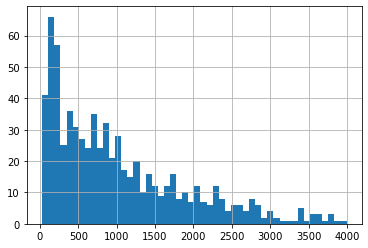

In [6]:
# für andere räume wiederholen

data["time_5min"] = data["time"].dt.round("5min")
min_max = data.groupby('time_5min', as_index=False)[['co2', 'time', 'People']].agg(['min', 'max'])
# min und max people wird immer gleich sein, da die 5 minuten zeitfenster immer auf eine lektion fallen
min_max.columns = ['min_co2', 'max_co2', 'min_time', 'max_time', 'min_people', 'max_people']

# filter time frames, where min is after max # eg es wurde gelüftet
min_max = min_max[min_max.min_time < min_max.max_time]

diff = (min_max["max_co2"] - min_max["min_co2"]).astype(float)/min_max["max_people"] * 323 # m^3
diff = diff[diff < 4000]
diff.hist(bins=50)
plt.show()

In [7]:
print(f"On average {np.mean(diff)} ppm of CO2 is emitted per person per m^3 in the Primarklasse OG1")

On average 1023.3871029960135 ppm of CO2 is emitted per person per m^3 in the Primarklasse OG1


In [8]:
data = l.get_measurement_for_timetable("Primarklasse_EG", stundenplan_primar_EG)

<AxesSubplot:>

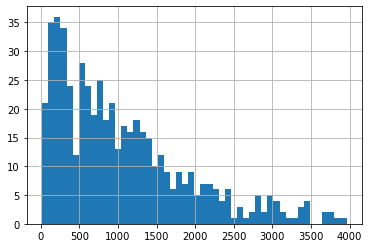

In [9]:
# für andere räume wiederholen

data["time_5min"] = data["time"].dt.round("5min")
min_max = data.groupby('time_5min', as_index=False)[['co2', 'time', 'People']].agg(['min', 'max'])
# min und max people wird immer gleich sein, da die 5 minuten zeitfenster immer auf eine lektion fallen
min_max.columns = ['min_co2', 'max_co2', 'min_time', 'max_time', 'min_people', 'max_people']

# filter time frames, where min is after max # eg es wurde gelüftet
min_max = min_max[min_max.min_time < min_max.max_time]

diff = (min_max["max_co2"] - min_max["min_co2"]).astype(float)/min_max["max_people"] * 210 # m^3
diff = diff[diff < 4000]
diff.hist(bins=50)

In [10]:
print(f"On average {np.mean(diff)} ppm of CO2 is emitted per person per m^3 in the Primarklasse EG")

On average 1051.6428939680359 ppm of CO2 is emitted per person per m^3 in the Primarklasse EG


In [11]:
data = l.get_measurement_for_timetable("oberstufe", stundenplan_oberstufe)

<AxesSubplot:>

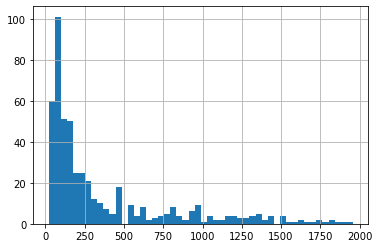

In [12]:
# für andere räume wiederholen

data["time_5min"] = data["time"].dt.round("5min")
min_max = data.groupby('time_5min', as_index=False)[['co2', 'time', 'People']].agg(['min', 'max'])
# min und max people wird immer gleich sein, da die 5 minuten zeitfenster immer auf eine lektion fallen
min_max.columns = ['min_co2', 'max_co2', 'min_time', 'max_time', 'min_people', 'max_people']

# filter time frames, where min is after max # eg es wurde gelüftet
min_max = min_max[min_max.min_time < min_max.max_time]

diff = (min_max["max_co2"] - min_max["min_co2"]).astype(float)/min_max["max_people"] * 202 # m^3
diff = diff[diff < 2000]
diff.hist(bins=50)

In [13]:
print(f"On average {np.mean(diff)} ppm of CO2 is emitted per person per m^3 in the Oberstufe")

On average 368.59974358974324 ppm of CO2 is emitted per person per m^3 in the Oberstufe


In [14]:
# psdeudo:
# Select time, max(co2) from Primarklasse_OG1 where time > '2020-05-03 08:00:00' and time < '2020-05-03 17:30:00'
# Select time, min(Co2) from Primarklasse_OG1 where in between (time_from 30 min before previous querry) and (time_to previous query)
from datetime import datetime

Monday_05_02 = l.get_measurement(name = "Primarklasse_OG1", startDate = "2022-05-02 08:00:00", endDate = "2022-05-02 18:30:00")
Tuesday_05_03 = l.get_measurement(name = "Primarklasse_OG1", startDate = "2022-05-03 08:00:00", endDate = "2022-05-03 18:30:00")
Wendsday_05_04 = l.get_measurement(name = "Primarklasse_OG1", startDate = "2022-05-04 08:00:00", endDate = "2022-05-04 18:30:00")
Thursday_05_05 = l.get_measurement(name = "Primarklasse_OG1", startDate = "2022-05-05 08:00:00", endDate = "2022-05-05 18:30:00")
Firday_05_06 = l.get_measurement(name = "Primarklasse_OG1", startDate = "2022-05-06 08:00:00", endDate = "2022-05-06 18:30:00")

column = Monday_05_02["co2"]

print(Monday_05_02['co2'].max())

max_entry_m = Monday_05_02.query(f"co2 == {Monday_05_02['co2'].max()}")
max_entry_t = Tuesday_05_03.query(f"co2 == {Tuesday_05_03['co2'].max()}")
max_entry_w =Wendsday_05_04.query(f"co2 == {Wendsday_05_04['co2'].max()}")
max_entry_t =Thursday_05_05.query(f"co2 == {Thursday_05_05['co2'].max()}")
max_entry_f =Firday_05_06.query(f"co2 == {Firday_05_06['co2'].max()}")

print((max_entry_m['time'].values[0]))
datatime = max_entry_m['time'].values[0]
print(datetime.timestamp(datetime))
Monday_05_02.query(f"time == '{pd.to_datetime(max_entry_m['time'].values[0])}'")

1011.0
2022-05-02T12:59:45.540150000


TypeError: descriptor 'timestamp' for 'datetime.datetime' objects doesn't apply to a 'type' object